In [277]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df= pd.read_csv(r"C:\Users\ali umar hasan\Downloads\day - day.csv")

In [340]:
df.shape

(730, 16)

In [5]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [351]:
df['yr'].unique()

array([0, 1], dtype=int64)

In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


We can draw inferences like
1) In total of 4 seasons we have 730 instants and in 4 seaons we have an average registered customers of 3659
   ie 914 registers per season
   
2) we have standard deviation in weather of 0.544 and 7- 8 degree of std in temp that could cause effect customer count

3) we have std of 1560 registeration and 1936 of cnt ie a profit scaling factor

<AxesSubplot:>

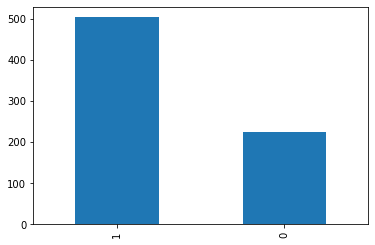

In [352]:
df['workingday'].value_counts().plot.bar()

In [10]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
df.cnt

0       985
1       801
2      1349
3      1562
4      1600
       ... 
725    2114
726    3095
727    1341
728    1796
729    2729
Name: cnt, Length: 730, dtype: int64

In [12]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

Descretizing the values for further simplification 

In [13]:
fl = ['float64']

In [17]:
df.update(df.select_dtypes(include = fl).round())

In [18]:
df.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.0,18.0,81.0,11.0,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,15.0,18.0,70.0,17.0,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.0,9.0,44.0,17.0,120,1229,1349


In [19]:
df.corr()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,4.135867e-01,8.660262e-01,4.982507e-01,0.016275,-0.001182,-0.015171,-0.021862,0.149132,0.152800,0.015133,-0.114404,0.275604,0.660544,0.629896
season,0.413587,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,0.004012,0.017868,0.021306,0.333352,0.341072,0.206431,-0.230908,0.208737,0.410310,0.404584
yr,0.866026,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,0.000685,-0.011852,-0.050322,0.047677,0.048125,-0.112767,-0.012403,0.250502,0.596911,0.569728
mnth,0.498251,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,-0.004059,-0.010414,0.045613,0.217969,0.224637,0.223504,-0.209957,0.121208,0.291952,0.278191
holiday,0.016275,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.020145,-0.257009,-0.034395,-0.031342,-0.030854,-0.016183,0.006097,0.054055,-0.109142,-0.068764
weekday,-0.001182,4.012478e-03,6.852851e-04,-4.059002e-03,-0.020145,1.000000,0.001588,0.034216,0.046606,0.040678,0.009056,-0.013557,-0.350848,0.199326,0.036183
workingday,-0.015171,1.786841e-02,-1.185197e-02,-1.041372e-02,-0.257009,0.001588,1.000000,-0.026332,0.002780,0.009615,0.054205,-0.001325,-0.090369,0.005466,-0.027640
weathersit,-0.021862,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.034216,-0.026332,1.000000,-0.119695,-0.122892,0.591126,0.039104,-0.246044,-0.259025,-0.295929
temp,0.149132,3.333522e-01,4.767703e-02,2.179688e-01,-0.031342,0.046606,0.002780,-0.119695,1.000000,0.990281,0.129068,-0.164112,0.539849,0.540651,0.627000
atemp,0.152800,3.410719e-01,4.812480e-02,2.246365e-01,-0.030854,0.040678,0.009615,-0.122892,0.990281,1.000000,0.139958,-0.189864,0.543006,0.545572,0.632085


<AxesSubplot:>

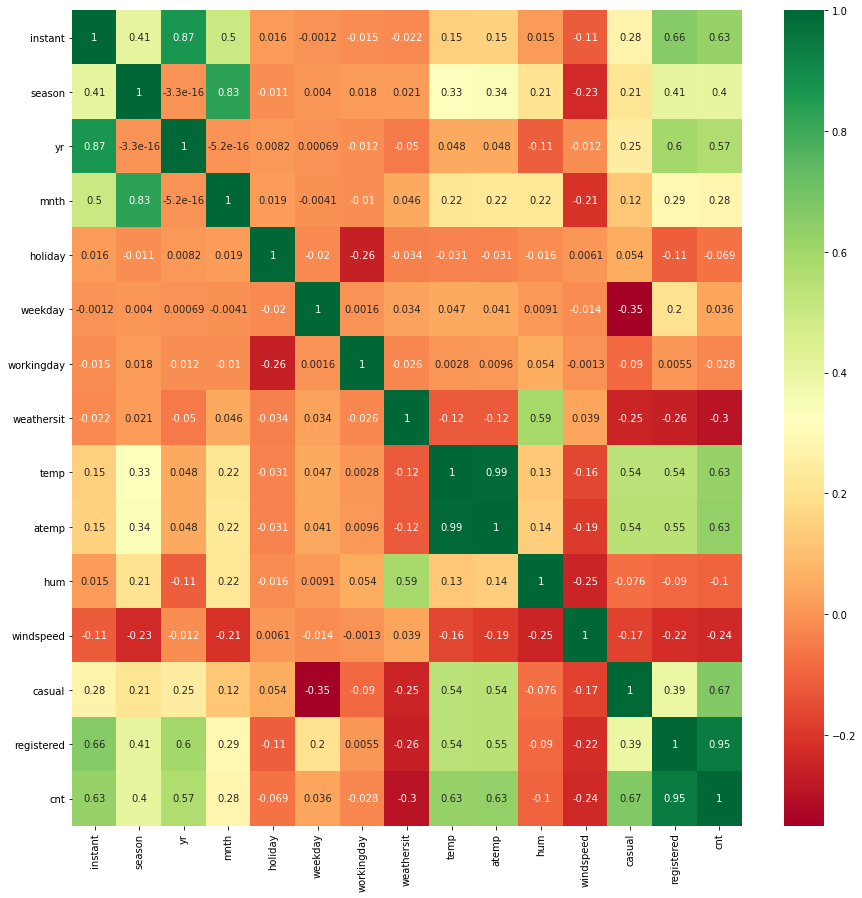

In [24]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(),annot = True, cmap = 'RdYlGn')

In [27]:
df[['registered','casual','atemp','cnt']].groupby(['cnt'], as_index = False).mean().sort_values(by ='cnt' ,ascending = False)

,cnt,registered,casual,atemp
694,8714,5554.0,3160.0,29.0
693,8555,5966.0,2589.0,27.0
692,8395,5883.0,2512.0,31.0
691,8362,5893.0,2469.0,29.0
690,8294,4884.0,3410.0,28.0
...,...,...,...,...
4,605,491.0,114.0,18.0
3,506,472.0,34.0,10.0
2,441,432.0,9.0,11.0
1,431,416.0,15.0,11.0


In [25]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [131]:
top_3 = []

In [132]:
top_3.append(np.corrcoef(df['cnt'],df['registered'])[0,1])


In [133]:
top_3.append(np.corrcoef(df['cnt'],df['casual'])[0,1])

In [134]:
top_3.append(np.corrcoef(df['cnt'],df['atemp'])[0,1])

Getting top 3 highly correlated features with the 'cnt'

In [135]:
top_3

[0.9454106118483709, 0.6721234097443969, 0.6320848689258294]

In [136]:
index = {'registered','casual','atemp'}

In [111]:
top_3 = pd.DataFrame(top_3,index)

In [129]:
top_3.values

array([[0.94541061],
       [0.67212341],
       [0.63208487]])

pie chart of Top 3 correlated features 

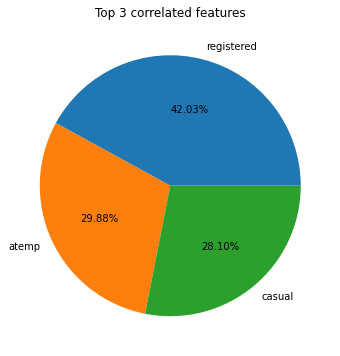

In [353]:
plt.figure(figsize = (6,6))
plt.pie(top_3,labels =index, autopct = '%1.2f%%')
plt.title('Top 3 correlated features')
plt.show()


In [143]:
df.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.0,18.0,81.0,11.0,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,15.0,18.0,70.0,17.0,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.0,9.0,44.0,17.0,120,1229,1349


# using Scaling techniques for maximum accuracy of the model

In [355]:
from sklearn.preprocessing import MinMaxScaler #normalizing the correlated features

In [150]:
data2 = df[['atemp','casual','registered','cnt']]

In [151]:
data2.head()

,atemp,casual,registered,cnt
0,18.0,331,654,985
1,18.0,131,670,801
2,9.0,120,1229,1349
3,11.0,108,1454,1562
4,11.0,82,1518,1600


In [152]:
norm = MinMaxScaler()

In [153]:
data2_norm = norm.fit_transform(data2)

In [155]:
data2_norm = pd.DataFrame(data2_norm)

In [157]:
data2_norm.columns = data2.columns

In [158]:
data2_norm

,atemp,casual,registered,cnt
0,0.368421,0.096538,0.091539,0.110792
1,0.368421,0.037852,0.093849,0.089623
2,0.131579,0.034624,0.174560,0.152669
3,0.184211,0.031103,0.207046,0.177174
4,0.184211,0.023474,0.216286,0.181546
...,...,...,...,...
725,0.184211,0.071890,0.266676,0.240681
726,0.236842,0.188380,0.350996,0.353543
727,0.210526,0.046068,0.167774,0.151749
728,0.210526,0.106221,0.203869,0.204096


# KNN Regressor application

In [281]:
X = data2_norm.iloc[:,:-1] #independent features

In [282]:
y = data2_norm.iloc[:,-1] #dependent features

In [283]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30 , random_state = 42)

In [284]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((511, 3), (219, 3), (511,), (219,))

In [305]:
y_train = y_train.values.reshape(-1,1)

In [306]:
y_train.shape

(511, 1)

In [307]:
y_test = y_test.values.reshape(-1,1)

In [308]:
y_test.shape

(219, 1)

In [321]:
from sklearn.neighbors import KNeighborsRegressor
score = []
for k in range(1,20):   # running for different K values to know which yields the max accuracy. 
    clf = KNeighborsRegressor(n_neighbors = k,  weights = 'distance', p=1)
    clf.fit(X_train, y_train)
    score.append(clf.score(X_test, y_test ))    

In [330]:
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import os

In [324]:
!pip install cufflinks

  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68724 sha256=8c7a731fe8af359cafc31d02981fb2cb54b04af64528e70367477216c798aee8
  Stored in directory: c:\users\ali umar hasan\appdata\local\pip\cache\wheels\6b\76\62\6da97734911ffcbdd559fd1a3f28526321f0ae699182a23866
Successfully built cufflinks


In [327]:
!pip install chart-studio

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11429 sha256=dbb278798b90ef132f839ce0e2abdcc9aed0a1c0cf9791a875452af9b54ce303
  Stored in directory: c:\users\ali umar hasan\appdata\local\pip\cache\wheels\c4\a7\48\0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying


In [331]:
trace0 = go.Scatter(
    y = score,
    x = np.arange(1,len(score)+1), 
    mode = 'lines+markers', 
    marker = dict(
        color = 'rgb(150, 10, 10)'
    )
)
layout = go.Layout(
    title = '', 
    xaxis = dict(
        title = 'K value', 
        tickmode = 'linear'
    ),
    yaxis = dict(
        title = 'Score',
#         range = [0, 10000]
    )
)
fig = go.Figure(data = [trace0], layout = layout)
iplot(fig, filename='basic-line')


In [332]:
k_max = score.index(max(score))+1
print( "At K = {}, Max Accuracy = {}".format(k_max, max(score)*100))

At K = 6, Max Accuracy = 99.17502408633928


In [333]:
clf = KNeighborsRegressor(n_neighbors = k_max,  weights = 'distance', p=1)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test ))   
y_pred = clf.predict(X_test)

0.9917502408633928


In [338]:
from sklearn.metrics import r2_score

In [339]:
print(r2_score(y_pred,y_test))

0.991421185783199
